# Serie de Fourier

Sea la señal:

\begin{equation}
x(t) = \begin{cases} 1, & -T/2 \leq t < 0 \\ -1, & 0 \leq t < T/2 \end{cases}
\end{equation}


Text(0, 0.5, 'x(t)')

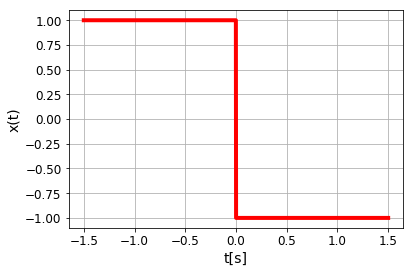

In [60]:
# Para graficar
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 3 #3 segundos de grafica
Fs = 500 # 500 muestras por segundo
Nm = T*Fs #numero de muestras requeridas
tv = np.linspace(-T/2,T/2,Nm)

xo = np.concatenate((np.ones(int(Nm/2)), -np.ones(int(Nm/2))), axis=0)

plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)


Su espectro en serie de Fourier se calcula como:

\begin{equation}
c_n = \frac{1}{T}\int_{-T/2}^{T/2}{x(t)e^{-jn\omega_ot}dt},
\end{equation}
donde:

\begin{equation}
c_n = \frac{j}{n\pi}((-1)^n-1)
\end{equation}

Además, se sabe que la reconstrucción de $x(t)$ desde el espectro $c_n$ se obtiene como:

\begin{equation}
\hat{x}(t) = \sum\limits_{n=-N}^N{c_n e^{jnw_ot}}
\end{equation}


In [61]:
N = 50 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamentas
# %% definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)
    


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


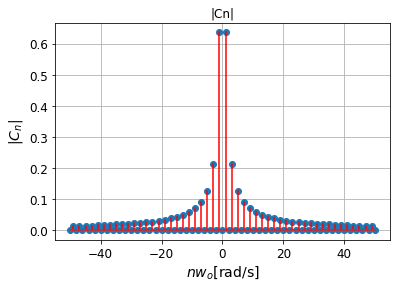

In [62]:
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = ((1j)/(nv*np.pi))*(1-(-1)**nv) 
Cn[N] = 0 
#graficar espectro
#plt.figure(figsize = (10, 8))
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
        

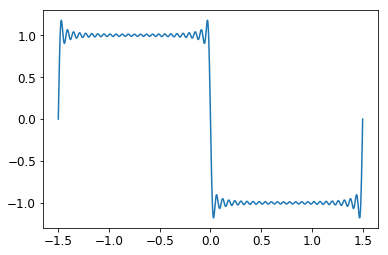

In [63]:
xe = phin @ Cn  #producto matricial para calcular componentes espectrales
plt.plot(tv,xe)

La serie de Fourier asume $x(t)$ como señal en tiempo continuo, pero evaluado en un segmento finito $t\in[-T/2,T/2].$ Por consiguiente, si se evalua $t$ fuera del rango de análisis la serie asume periodicidad en la señal de entrada.

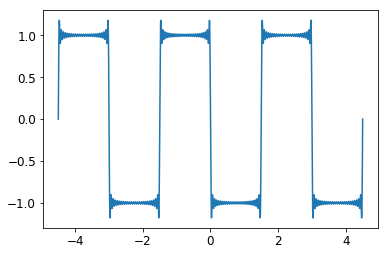

In [64]:

Np = 3 #numero de periodos a graficar
tv2 = np.linspace(-Np*T/2,Np*T/2,Np*T*Fs)
phin2 = np.zeros((len(tv2),2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin2[:,n+N] = np.exp(1j*n*wo*tv2)
    
xe2 = phin2 @ Cn  #producto matricial para calcular componentes espectrales
plt.plot(tv2,xe2)

# Transformada de Fourier

La transformada de Fourier se puede entender como la extensión de la serie de Fourier para $t\in(-\infty,+\infty)$:

\begin{equation}
X(\omega) = \int_{-\infty}^{+\infty}{x(t)e^{-j\omega t}dt}.
\end{equation}
La respectiva transformada inversa (extensión de la reconstrucción mediante serie de Fourier con $t\in(-\infty,+\infty)$) se define como:

\begin{equation}
x(t) = \frac{1}{2\pi}\int_{-\infty}^{+\infty}{X(\omega)e^{j\omega t}d\omega}.
\end{equation}

Cabe resaltar entonces que el concepto de espectro en frecuencia para la transformada de Fourier asume que $\omega \in (-\infty,+\infty).$

En resumen, la serie de Fourier analiza $x(t)\in \mathbb{R} o \mathbb{C}$ en tiempo continuo sobre segmento finito $t\in [-T/2,+T/2]$, en espectro en frecuencia discreto $c_n \in \mathbb{R} o \mathbb{C}$, con $n\in \mathbb{Z}.$ La transformada de Fourier analiza $x(t)\in \mathbb{R} o \mathbb{C}$ en tiempo continuo sobre segmento infinito $t\in (-\infty,+\infty)$, en espectro en frecuencia continuo (función de densidad espectral) $X(\omega)\in \mathbb{R} o \mathbb{C}$, con $\omega\in (-\infty,+\infty).$




# Transformada de Fourier en tiempo discreto

A partir de la transformada de Fourier, se puede analizar también una señal en tiempo discreto $x[k]\in \mathbb{R} o \mathbb{C},$ con $k\in\mathbb{Z}$, con el fin de calcular su espectro en frecuencia continuo (función de densidad espectral) $X(\omega)\in \mathbb{R} o \mathbb{C}$, pero con $\omega$ continua en el intervalo $\omega\in [-\pi,+\pi]$ o $\omega\in [0,2\pi],$  dado que las bases de representación requieren restringir la codificación de la señal $x[n]$ utilizando funciones seno y coseno originales según la expresión:

\begin{equation}
X(\omega) = \sum_{k=0}^{K-1}{x[k]e^{-j\omega k}},
\end{equation}
en donde se asume una señal en tiempo discreto con $K$ muestras. A la expresión anterior se le conoce comunmente como la trasformada de Fouirer en tiempo discreto (Discrete time Fourier transform - DTFT). 
y su respectiva transformada inversa (iDTFT) se expresa como:


\begin{equation}
x[k] = \frac{1}{2\pi}\int_{-\pi}^{+\pi}{X(\omega)e^{j\omega k}d\omega}=\frac{1}{2\pi}\int_{0}^{+2\pi}{X(\omega)e^{j\omega k}d\omega}
\end{equation}


# Transformada discreta de Fourier y transformada rápida de Fourier

Sin embargo, tanto para la serie de Fourier, como para la transformada (continua y discreta en tiempo), se require de la resolución analítica de integrales, además, de las suposición de intervalos infinitos en tiempo y frecuencia (para el caso de la transformada de Fourier), los cuales no son viables ni implementables en la práctica. 

Por consiguiente, el concepto de espectro en frecuencia se extiende a sistemas de proceso de digital (tiempo discreto y  frecuencia discreta), mediante el cálculo de la transformada discreta de Fourier (Discrete Fourier Transform - DFT).

En este caso, la transformada discreta se define como:

\begin{equation}
X[n] = \sum_{k=0}^{K-1}{x[k]e^{-jk\frac{2\pi n}{K}}},
\end{equation}

es decir, la DFT es una discretización en frecuencia de la DTFT: 

\begin{equation}
X[n] = X(\omega)\Big|_{\omega=\frac{2\pi n}{K}},
\end{equation}
y con respecto a la serie de Fourier la DFT se puede relacionar mediante:

\begin{equation}
X[n] = K c_n,
\end{equation}
asumiendo señal en tiempo discreto y $\omega_o = \frac{2\pi}{K}$ en representación por serie.

Por otra parte, la transforma de Fourier inversa (iDFT) se define como:

\begin{equation}
x[k] = \sum_{n=0}^{K-1}{X[n]e^{jk\frac{2\pi n}{K}}}.
\end{equation}

Note que las variables tiempo y frecuencia discretas $n,k\in[0,K-1].$ Dado que la frecuencia fundamental se restringe como $\omega_o=\frac{2\pi}{K},$ las bases de representación en tiempo discreto codificaran frecuencias angulares en el rango $[0,2\pi)$ (cosenos y senos originales).

No obstante, en la práctica el cálculo de las sumatorias es costoso computacionalmente, a medida que $K$ aumenta. Por consiguiente, se cuentan con paquetes computacionales que optimizan el cálculo de la DFT de forma rápida, lo que conlleva a la comunmente conocida transformada rápida de Fourier (Fast Fourier Transform - FFT).

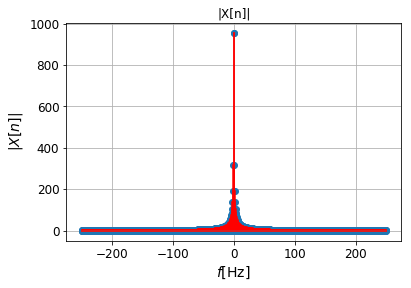

Text(0, 0.5, '$|X[n]|/K$')

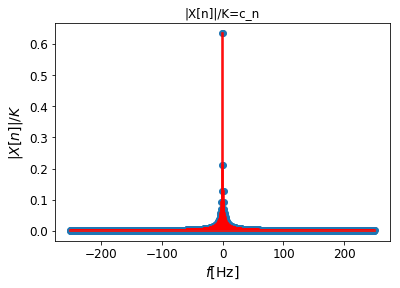

In [65]:
#cálculo de la FFT de la señal signo invertido
vf = np.fft.fftfreq(len(xo),1/Fs) #calculo vector de frecuencias
Xw = np.fft.fft(xo) #cálculo FFT

plt.stem(vf,abs(Xw),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/len(vf),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)


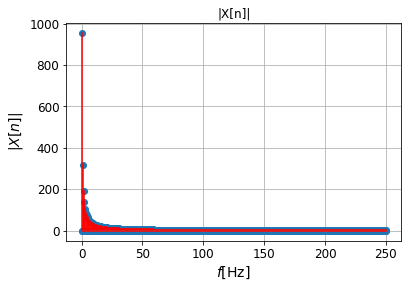

Text(0, 0.5, '$|X[n]|/K$')

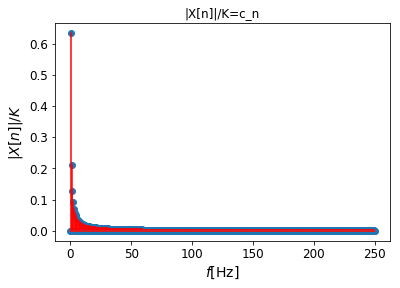

In [67]:
#dado que el espectro es simétrico, y aprovechando señales netamente reales
#se sugiere utilizar la expresión simplificada rfft

vf = np.fft.rfftfreq(len(xo),1/Fs) #calculo vector de frecuencias
Xw = np.fft.rfft(xo) #cálculo FFT
plt.stem(vf,abs(Xw),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/(2*len(vf)),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)


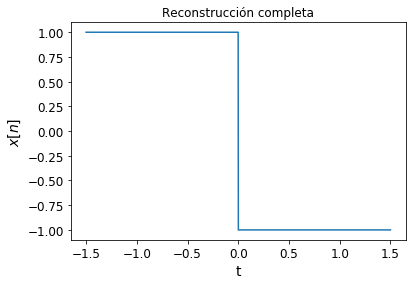

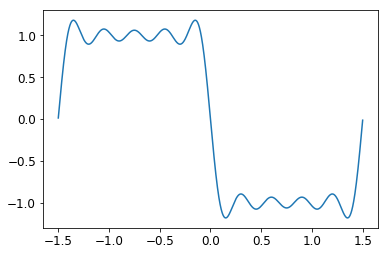

In [68]:
#la reconstrucción de x[k] se puede obtener mediante la transformada inversa
xe = np.fft.irfft(Xw)
plt.plot(tv,xe)
plt.title(r'Reconstrucción completa')
plt.xlabel(r't',fontsize = 14)
plt.ylabel(r'$x[n]$',fontsize = 14)
plt.show()
#se pueden escoger o ponderar los coeficientes para filtrar (alterar) la reconstrucción
ind = range(10,750)
Xwf = Xw.copy()
Xwf[ind] = 0
xe2 = np.fft.irfft(Xwf)
plt.plot(tv,xe2)
plt.show()


# Ejemplo FFT con señal de audio



Audio a procesar (el archivo debe estar en la carpeta directorio del cuaderno):

<audio src="Queens_Of_The_Stone_Age_Little_Sister.mp3" controls>Your browser does not support the audio element.</audio>
[Queens_Of_The_Stone_Age_Little_Sister.mp3](Queens_Of_The_Stone_Age_Little_Sister.mp3)

In [69]:
#por facilidad de proceso se sugiere utilizar el paquete ffmpeg compilado - 
#ffmpeg.exe debe estar en el directorio actual para convertir los archivos
#de audio a .wav
#link descarga ffmpeg: https://ffmpeg.zeranoe.com/builds/
import os
nombre_in = "Queens_Of_The_Stone_Age_Little_Sister.mp3"
nombre_out = "output.wav"
command_consola = "ffmpeg -i " + nombre_in +" "+ nombre_out
os.system(command_consola)

import soundfile as sf # para instalar pip install soundfile 
#lee archivos wav
x, fs = sf.read('output.wav')

# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))



Frecuencia de muestreo 44100.00[Hz]
audio output.wav


Text(0, 0.5, '$|X[n]|$')

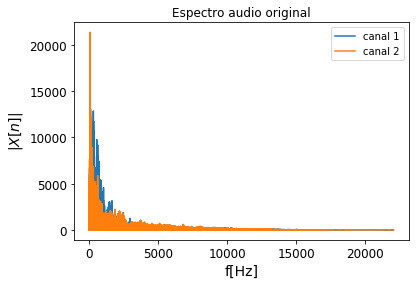

In [70]:
xpro = x.copy() #copiar archivos para procesar
Xw = np.fft.rfft(xpro,axis=0) # fft por cada columna de xpro
vf = np.fft.rfftfreq(np.size(xpro,0),1/fs)
plt.plot(vf,abs(Xw))
plt.legend(('canal 1','canal 2'))
plt.title(r'Espectro audio original')
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)


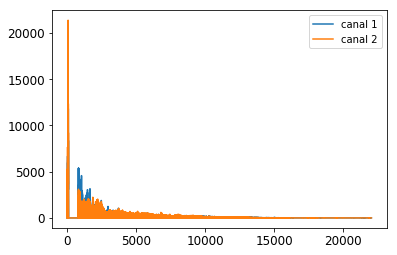

In [71]:
#filtrar espectro
Xwf = Xw.copy()
f1 = 100
f2 = 800
ind = ((vf > f1) & (vf < f2))
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))

In [72]:
xe2 = np.fft.irfft(Xwf,axis=0)

#Graficar en el tiempo puede ser muy costoso computacionalmente
# muchos puntos

#Num = np.size(xpro,0)
#T = Num/fs
#tc = np.linspace(0,T-1/fs,Num)

#plt.plot(tc,xpro)
#plt.legend(('canal 1','canal 2'))
#plt.title(r'audio original')
#plt.xlabel(r't',fontsize = 14)
#plt.ylabel(r'$x(t)$',fontsize = 14)
#plt.show()


#Num = np.size(xe2,0)
#T = Num/fs
#tc = np.linspace(0,T-1/fs,Num)

#plt.plot(tc,xe2)
#plt.legend(('canal 1','canal 2'))
#plt.title(r'audio filtrado')
#plt.xlabel(r't',fontsize = 14)
#plt.ylabel(r'$x(t)$',fontsize = 14)
#plt.show()


In [74]:
name_out_fil = 'new_file.wav'
sf.write(name_out_fil, xe2, fs)
print('Audio filtrado\n')

Audio filtrado



Audio filtrado new_file.wav...:

<audio src="new_file.wav" controls>Your browser does not support the audio element.</audio>
[new_file.wav](new_file.wav)